In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import pickle

#Import supplementary visualization code visuals.py
import visuals as vs

# Display all visuals inline
%matplotlib inline
%pylab inline

# Load the Banknote Authentication dataset
data = pd.read_csv("dataset.csv")
data.columns = ['variance', 'skewness', 'kurtosis', 'entropy', 'class']

display(data.head(n=6))

classes = data['class']
features = data.drop('class', axis=1)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


,variance,skewness,kurtosis,entropy,class
0,1381.959402,-1.449583,3.101754,15.228940,0
1,1435.389496,-0.462462,-0.598459,6.969584,1
2,1232.524044,-1.698554,4.383115,6.592073,0
3,1363.271071,-0.500755,-0.520225,15.255953,1
4,1431.714841,-1.581537,3.352120,6.780989,0
5,1203.330041,-0.204370,-0.008108,6.699252,1


In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
n_records = len(data)
n_fake_notes = len(data[data['class'] == 0])
n_real_notes = len(data[data['class'] == 1])
print ("Total number of records: "+format(n_records))
print ("Total number of fake notes: "+format(n_fake_notes))
print ("Total number of real notes: "+format(n_real_notes))

missing_values = data.isnull().sum().sum()
if missing_values == 0:
    print ("\nThere are no missing values in the dataset")
else:
    print("\nThe dataset has missing values"+format(missing_values))

Total number of records: 26999
Total number of fake notes: 4050
Total number of real notes: 22949

There are no missing values in the dataset


In [10]:
display(data.describe())

,variance,skewness,kurtosis,entropy,class
count,26999.000000,26999.000000,26999.000000,26999.000000,26999.000000
mean,1339.278740,-0.593411,0.400711,9.945751,0.849994
std,398.064622,0.477883,1.476146,4.071775,0.357083
min,478.788738,-1.898375,-0.844962,6.148481,0.000000
25%,1219.857878,-0.724481,-0.531470,6.755494,1.000000
50%,1386.177941,-0.487565,-0.289740,7.079487,1.000000
75%,1594.577910,-0.247570,0.647941,15.025690,1.000000
max,2236.336795,0.100905,5.342338,15.979195,1.000000


d:\Murali\College Projects\CCDA\currency detection\visuals.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


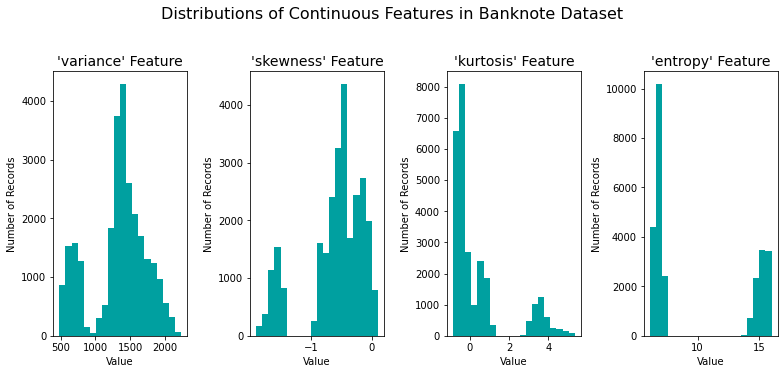

In [14]:


# feature plotting
vs.distribution(data)



d:\Murali\College Projects\CCDA\currency detection\visuals.py:58: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


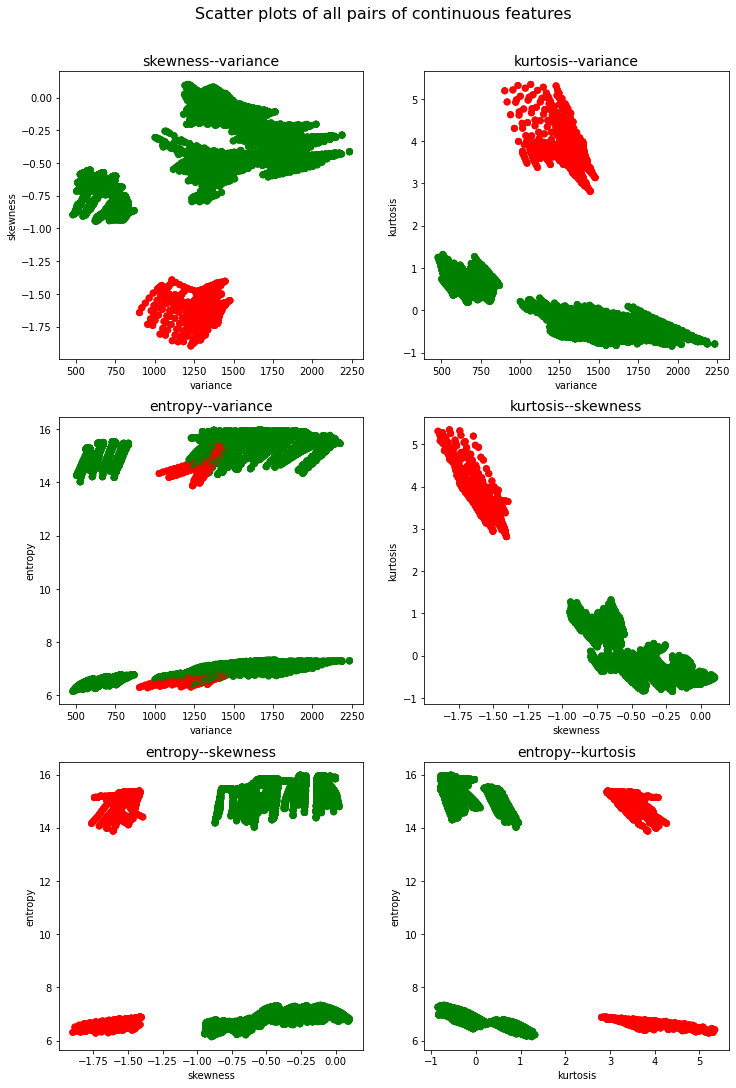

In [15]:
vs.scatter(data)


In [16]:
from sklearn.preprocessing import MinMaxScaler
numerical = ['variance', 'skewness', 'kurtosis', 'entropy']
scaler = MinMaxScaler()
features[numerical] = scaler.fit_transform(features[numerical])

display(features.head(n = 6))

,variance,skewness,kurtosis,entropy
0,0.513881,0.224477,0.637874,0.923683
1,0.544281,0.718215,0.039840,0.083524
2,0.428856,0.099947,0.844969,0.045123
3,0.503248,0.699062,0.052484,0.926430
4,0.542191,0.158476,0.678338,0.064340
5,0.412246,0.847308,0.135253,0.056026


In [17]:


# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'classes' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size = 0.4, random_state = 5)

# Show the results of the split
print ("Training set has samples "+format(X_train.shape[0]))
print ("Testing set has samples "+format(X_test.shape[0]))



Training set has samples 16199
Testing set has samples 10800


In [18]:


# Calculate Accuracy
accuracy = float(n_fake_notes)/n_records

# Calculate F-Score with beta = 2
precision = accuracy
recall = 1
beta = 2
fscore = (1 + beta ** 2) * precision * recall /(beta ** 2 * precision + recall)

# Print the results 
print (accuracy,fscore)



0.1500055557613245 0.46876085094562375


In [28]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    beta=2
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set,
    # then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta)
    
    # Compute Confusion Matrix
    results['conf_mat'] = confusion_matrix(y_test, predictions_test)
       
    # Success
    print (learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

In [31]:
# Import the three supervised learning models from sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from math import ceil
from time import time

# Initialize the three models
clf_A = KNeighborsClassifier(n_neighbors = 5)
clf_B = SVC(random_state = 5)
clf_C = GradientBoostingClassifier(random_state = 5)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_5 = int(X_train.shape[0] * 0.05)
samples_20 = int(X_train.shape[0] * 0.2)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_5, samples_20, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

print ("\nTrain-Test Scores when trained on entire training set")
for key, value in results.items():
    print ("For ",key," Classifier, scores on training and test set are:")
    print ("Accuracy on Train set: {}",value[2]['acc_train'])
    print ("Accuracy on Test set: {}",value[2]['acc_test'])
    print ("F-score on Train set: {}",value[2]['f_train'])
    print ("F-score on Test set: {}",value[2]['f_test'])
    print ("Confusion Matrix for test set:\n {}",value[2]['conf_mat'])
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

d:\Murali\College Projects\CCDA\myenv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\Murali\College Projects\CCDA\myenv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


TypeError: fbeta_score() takes 2 positional arguments but 3 were given

In [13]:
acc_scores = []
fbeta_scores = []
k_range = range(1,16)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc_scores.append(accuracy_score(y_test,y_pred))
    fbeta_scores.append(fbeta_score(y_test, y_pred, beta=2))


In [14]:
for i in range(len(acc_scores)):
    print ("{}: Accuracy is {}, f-score is {}".format(i+1,acc_scores[i], fbeta_scores[i]))

1: Accuracy is 1.0, f-score is 1.0
2: Accuracy is 1.0, f-score is 1.0
3: Accuracy is 1.0, f-score is 1.0
4: Accuracy is 1.0, f-score is 1.0
5: Accuracy is 1.0, f-score is 1.0
6: Accuracy is 1.0, f-score is 1.0
7: Accuracy is 1.0, f-score is 1.0
8: Accuracy is 1.0, f-score is 1.0
9: Accuracy is 1.0, f-score is 1.0
10: Accuracy is 1.0, f-score is 1.0
11: Accuracy is 1.0, f-score is 1.0
12: Accuracy is 1.0, f-score is 1.0
13: Accuracy is 1.0, f-score is 1.0
14: Accuracy is 1.0, f-score is 1.0
15: Accuracy is 1.0, f-score is 1.0


In [15]:
# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state = 5)
# Train the supervised model on the training set 
model = clf.fit(X_train, y_train)

# Extract the feature importances
importances = model.feature_importances_

print ("Feature Importances with regard to Random Forest Classifier:")
print (importances)
print ("Feature Importances with regard to Gradient Boosting Classifier:")
print (clf_C.feature_importances_)

Feature Importances with regard to Random Forest Classifier:
[0.12 0.42 0.44 0.02]
Feature Importances with regard to Gradient Boosting Classifier:
[1.51391148e-02 8.87126344e-01 9.73312005e-02 4.03341079e-04]


In [17]:

pickle.dump(knn,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))